# **LSTM MultiEntrada Clasificador - Empresa Southern Copper**
#### **Curso:** Inteligencia de Negocios
#### **Docente:**  Mg. Ernesto D. Cancho Rodríguez
#### **Equipo:** D
#### **Integrantes:**
*   Hurtado Santos, Estiven Salvador - 20200135
*   López Terrones, Ximena Xiomy - 20200020
*   Llactahuaman Muguerza, Anthony Joel - 20200091
*   Mondragón Zúñiga, Rubén Alberto - 20200082
*   Morales Robladillo, Nicole Maria - 20200136
*   Aquije Vásquez, Carlos Adrian - 19200319
*   Cespedes Flores, Sebastian - 1820025

### Importamos Librerías

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
#Importamos la librería nueva
import yfinance as yf

In [3]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'

### Carga de datos SCCO

### Inputs para Predicción

#### Mercado de Commodities

##### Datos de GLD (ORO)

##### Datos de SLV (Plata)

##### Datos de COPX (Cobre)

#### Índicies

##### Datos de GSPC (Índice SP500)


##### Datos de IXIC (Índice NASDAQ)

##### Datos de DJI (Índice Dow Jones)

#### Mercado de divisas y Criptomonedas

##### Datos de PEN

##### Datos ETH

##### Datos BZ

##### Datos BTC

### Transformaciones

### Data del BCRP

#### Tasas de Interés

**Realizamos Transformaciones**

### Indicadores Bursátiles

**Realizamos Transformaciones**

#### Indicadores de Riesgo

#### Indice Precios Consumidor

#### Fred - Tasa Efectiva

### Combinamos la data

**Instalamos dependencias extras necesarias**

**Importamos librerías descargadas**

#### Limpieza de Datos

In [4]:
def obtenerData(instrumentoFinanciero, fechaInicio, fechaFin):
    IF_df = yf.download(instrumentoFinanciero,
                        start=fechaInicio, end=fechaFin)
    IF_df.columns += "_" + instrumentoFinanciero
    GLD_data = yf.download('GLD', start=fechaInicio, end=fechaFin)
    GLD_data.columns += "_GLD"
    SLV_data = yf.download('SLV', start=fechaInicio, end=fechaFin)
    SLV_data.columns += "_SLV"
    COPX_data = yf.download('COPX', start=fechaInicio, end=fechaFin)
    COPX_data.columns += "_COPX"
    GSPC_data = yf.download('^GSPC', start=fechaInicio, end=fechaFin)
    GSPC_data.columns += "_GSPC"
    IXIC_data = yf.download('^IXIC', start=fechaInicio, end=fechaFin)
    IXIC_data.columns += "_IXIC"
    DJI_data = yf.download('^DJI', start=fechaInicio, end=fechaFin)
    DJI_data.columns += "_DJI"
    PEN_X_data = yf.download('PEN=X', start=fechaInicio, end=fechaFin)
    PEN_X_data.columns += "_PEN_X"
    BZ_F_data = yf.download('BZ=F', start=fechaInicio, end=fechaFin)
    BZ_F_data.columns += "_BZ_F"
    df = pd.merge(IF_df, GLD_data, on='Date')
    df = pd.merge(df, SLV_data, on='Date')
    df = pd.merge(df, COPX_data, on='Date')
    df = pd.merge(df, GSPC_data, on='Date')
    df = pd.merge(df, IXIC_data, on='Date')
    df = pd.merge(df, DJI_data, on='Date')
    df = pd.merge(df, PEN_X_data, on='Date')
    df = pd.merge(df, BZ_F_data, on='Date')
    df = df.drop(['Volume_PEN_X'], axis=1)
    return df


In [5]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'
df = obtenerData('GOLD', fechaInicio, fechaFin)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
df['GOLD_Return'] = df['Close_GOLD'].pct_change()
df['GOLD_Return'] = df['GOLD_Return'].shift(-1)
df['GOLD_Return'] = df['GOLD_Return'].fillna(0)
df

,Open_GOLD,High_GOLD,Low_GOLD,Close_GOLD,Adj Close_GOLD,Volume_GOLD,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,GOLD_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.650000,15.240000,14.610000,15.200000,13.444444,15223200,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,-0.013158
2018-01-03,15.240000,15.270000,14.740000,15.000000,13.267539,15155900,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.002000
2018-01-04,15.030000,15.050000,14.790000,15.030000,13.294077,8936100,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.005323
2018-01-05,14.990000,15.000000,14.870000,14.950000,13.223316,6515600,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.014047
2018-01-08,14.880000,14.950000,14.640000,14.740000,13.037569,8362600,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.012212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,17.330000,17.500000,17.090000,17.389999,17.179596,12800800,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.021852
2022-12-27,17.459999,17.930000,17.430000,17.770000,17.555000,11654100,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.031514
2022-12-28,17.610001,17.660000,17.110001,17.209999,17.001774,12970700,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.002324


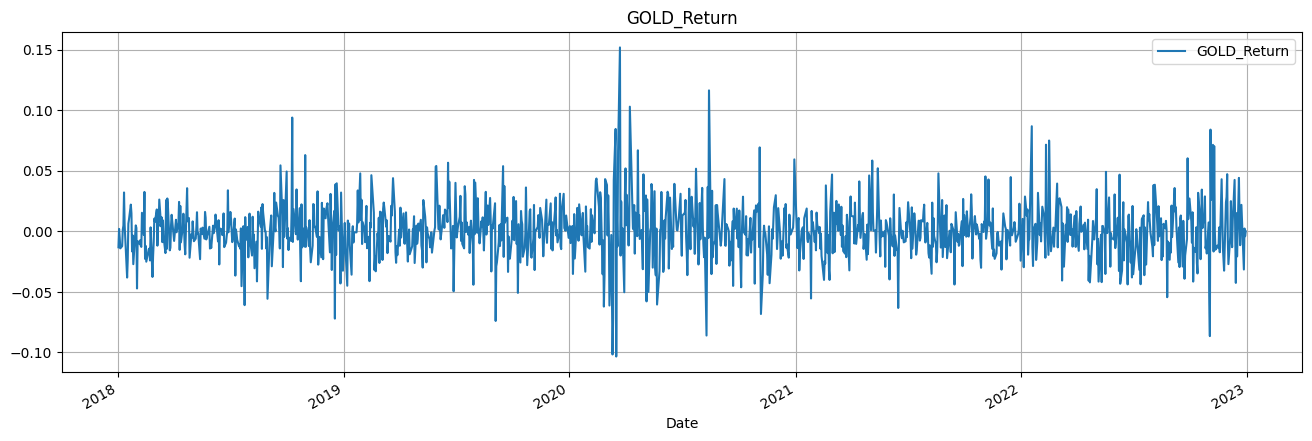

In [7]:
plt.figure(figsize=(16, 5))
plt.title("GOLD_Return")
df.GOLD_Return.plot()
plt.grid(True);
plt.legend()
plt.show()

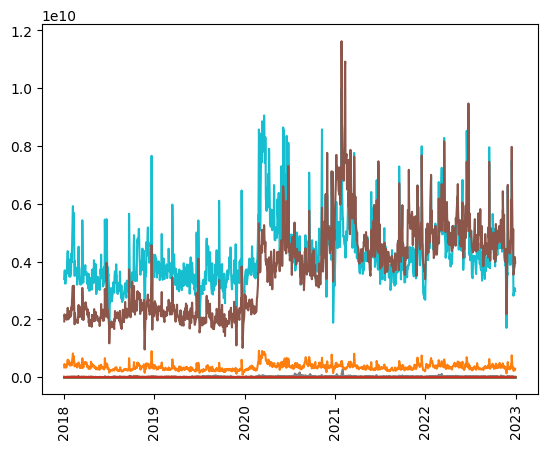

In [8]:
plt.plot(df);
plt.xticks(rotation='vertical');

### Procesamiento - Paso 1



In [9]:
df02 = df.copy()

In [10]:
df02.sample(10)

,Open_GOLD,High_GOLD,Low_GOLD,Close_GOLD,Adj Close_GOLD,Volume_GOLD,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,GOLD_Return
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-04,17.990000,18.420000,17.959999,18.230000,17.153711,17838500,163.690002,165.539993,163.470001,165.360001,...,4.058434,4.136000,4.136000,79.360001,82.000000,78.760002,81.260002,81.260002,43286,-0.004388
2019-07-08,15.870000,15.960000,15.650000,15.860000,14.288620,11664400,132.179993,132.339996,131.279999,131.289993,...,3.220100,3.289000,3.289000,64.370003,65.129997,63.799999,64.110001,64.110001,29582,0.011980
2022-07-05,17.969999,18.160000,17.080000,17.420000,16.820639,21597900,167.179993,167.330002,164.410004,164.750000,...,3.750849,3.768953,3.768953,111.610001,114.690002,101.110001,102.769997,102.769997,43356,-0.011481
2018-10-15,12.560000,12.950000,12.560000,12.700000,11.318202,28002300,116.120003,116.529999,115.889999,116.000000,...,3.269300,3.333000,3.333000,80.970001,81.910004,79.849998,80.779999,80.779999,31577,0.003937
2021-10-28,19.420000,19.469999,18.900000,18.940001,17.821793,20967400,168.979996,169.250000,167.529999,168.080002,...,3.909921,3.975000,3.975000,84.180000,84.570000,82.309998,84.320000,84.320000,10576,-0.030095
2022-11-08,14.620000,15.800000,14.550000,15.610000,15.271897,37409600,155.990005,159.869995,155.979996,159.449997,...,3.852606,3.942000,3.942000,98.000000,98.269997,94.980003,95.360001,95.360001,28901,-0.016656
2020-03-26,19.540001,20.180000,18.709999,19.580000,17.787626,24263100,153.309998,154.809998,152.080002,153.240005,...,3.411043,3.145000,3.145000,27.590000,27.670000,26.040001,26.340000,26.340000,26819,-0.017365
2020-02-19,20.809999,21.040001,20.400000,21.000000,19.014320,20183200,151.000000,151.820007,150.820007,151.789993,...,3.308858,3.382000,3.382000,57.700001,59.410000,57.540001,59.119999,59.119999,36217,-0.010952
2020-03-25,19.180000,19.730000,18.420000,19.110001,17.360651,30961900,152.580002,152.880005,151.009995,151.300003,...,3.442149,3.530500,3.530500,27.600000,28.280001,25.730000,27.389999,27.389999,27352,0.024594


### Tratamiento de Missing Values

In [11]:
df03 = df02.dropna()  # Eliminar filas con valores nulos

In [12]:
df03

,Open_GOLD,High_GOLD,Low_GOLD,Close_GOLD,Adj Close_GOLD,Volume_GOLD,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,GOLD_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.650000,15.240000,14.610000,15.200000,13.444444,15223200,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,-0.013158
2018-01-03,15.240000,15.270000,14.740000,15.000000,13.267539,15155900,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.002000
2018-01-04,15.030000,15.050000,14.790000,15.030000,13.294077,8936100,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.005323
2018-01-05,14.990000,15.000000,14.870000,14.950000,13.223316,6515600,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.014047
2018-01-08,14.880000,14.950000,14.640000,14.740000,13.037569,8362600,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.012212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,17.330000,17.500000,17.090000,17.389999,17.179596,12800800,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.021852
2022-12-27,17.459999,17.930000,17.430000,17.770000,17.555000,11654100,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.031514
2022-12-28,17.610001,17.660000,17.110001,17.209999,17.001774,12970700,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.002324


### Particionamiento en Entrenamiento y Test

In [13]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df03) * 0.8)
train_data = df03[:train_size]
test_data = df03[train_size-100:]

In [14]:
print(df03.shape)
print(train_size)
print(train_data.shape)
print(test_data.shape)

(1254, 54)
1003
(1003, 54)
(351, 54)


### Normalizamos la data en Escala de 0 y 1

In [15]:
df03.head()

,Open_GOLD,High_GOLD,Low_GOLD,Close_GOLD,Adj Close_GOLD,Volume_GOLD,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,GOLD_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.65,15.24,14.61,15.20,13.444444,15223200,124.660004,125.180000,124.389999,125.150002,...,3.1645,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,-0.013158
2018-01-03,15.24,15.27,14.74,15.00,13.267539,15155900,125.050003,125.089996,124.099998,124.820000,...,3.1712,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.002000
2018-01-04,15.03,15.05,14.79,15.03,13.294077,8936100,124.889999,125.849998,124.739998,125.459999,...,3.1667,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.005323
2018-01-05,14.99,15.00,14.87,14.95,13.223316,6515600,124.930000,125.480003,124.830002,125.330002,...,3.1480,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.014047
2018-01-08,14.88,14.95,14.64,14.74,13.037569,8362600,125.199997,125.320000,124.900002,125.309998,...,3.1462,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.012212


In [16]:
from sklearn.preprocessing import MinMaxScaler
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
scaled_train_data = scaler.fit_transform(train_data.drop(['GOLD_Return'], axis=1))

In [18]:
scaled_train_data.shape

(1003, 53)

In [19]:
scaled_test_data = scaler.transform(test_data.drop(['GOLD_Return'], axis=1))

In [20]:
print(type(scaled_train_data))
print(len(scaled_train_data))
print(scaled_train_data.shape)
scaled_train_data

<class 'numpy.ndarray'>
1003
(1003, 53)


array([[0.22987433, 0.25257249, 0.24853229, ..., 0.70433873, 0.70433873,
        0.27706508],
       [0.25732897, 0.2539757 , 0.25489238, ..., 0.72327412, 0.72327412,
        0.29527324],
       [0.24755698, 0.2436857 , 0.25733857, ..., 0.72670342, 0.72670342,
        0.26035129],
       ...,
       [0.39692878, 0.41253508, 0.42514676, ..., 0.89309679, 0.89309679,
        0.07892498],
       [0.40437409, 0.42329278, 0.43346379, ..., 0.89443862, 0.89443862,
        0.00327609],
       [0.43136339, 0.43217961, 0.45254409, ..., 0.89264941, 0.89264941,
        0.24770674]])

In [21]:
# Crear secuencias de tiempo para el modelo LSTM
window_size = 100

def create_sequences(data):
    x = []
    y = []
    for i in range( window_size , len(data) ):

        x.append( data[i-window_size:i] )
        y.append( data[i][-1] )


    return np.array(x), np.array(y)

In [22]:
x_train, y_train = create_sequences(scaled_train_data)

In [23]:
x_train.shape

(903, 100, 53)

In [24]:
y_train.shape

(903,)

In [25]:
x_test, y_test = create_sequences(scaled_test_data)

In [26]:
x_test.shape

(251, 100, 53)

In [27]:
y_test.shape

(251,)

In [28]:
x_train.shape[1]

100

In [29]:
x_train.shape[2]

53

### Modelo LSTM

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=160, return_sequences=True,
               input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Dropout(0.2))
model.add(LSTM(units=160))
# model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 160)          136960    
                                                                 
 lstm_1 (LSTM)               (None, 160)               205440    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 342561 (1.31 MB)
Trainable params: 342561 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Compilar el modelo
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [32]:
# Entrenar el modelo
model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/100
15/15 [==============================] - 5s 225ms/step - loss: 0.6614 - accuracy: 0.0011 - val_loss: 0.6132 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 3s 205ms/step - loss: 0.6551 - accuracy: 0.0011 - val_loss: 0.6049 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 3s 216ms/step - loss: 0.6537 - accuracy: 0.0011 - val_loss: 0.5995 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 3s 211ms/step - loss: 0.6525 - accuracy: 0.0011 - val_loss: 0.6068 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 3s 209ms/step - loss: 0.6520 - accuracy: 0.0011 - val_loss: 0.6015 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 3s 211ms/step - loss: 0.6523 - accuracy: 0.0011 - val_loss: 0.5992 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 3s 210ms/step - loss: 0.6519 - accuracy: 0.0011 - val_loss: 0.611

15/15 [==============================] - 3s 206ms/step - loss: 0.6285 - accuracy: 0.0022 - val_loss: 0.5840 - val_accuracy: 0.0000e+00
Epoch 57/100
15/15 [==============================] - 3s 212ms/step - loss: 0.6282 - accuracy: 0.0022 - val_loss: 0.5984 - val_accuracy: 0.0000e+00
Epoch 58/100
15/15 [==============================] - 3s 220ms/step - loss: 0.6247 - accuracy: 0.0022 - val_loss: 0.5956 - val_accuracy: 0.0000e+00
Epoch 59/100
15/15 [==============================] - 3s 222ms/step - loss: 0.6254 - accuracy: 0.0022 - val_loss: 0.6038 - val_accuracy: 0.0000e+00
Epoch 60/100
15/15 [==============================] - 3s 217ms/step - loss: 0.6273 - accuracy: 0.0022 - val_loss: 0.6130 - val_accuracy: 0.0000e+00
Epoch 61/100
15/15 [==============================] - 3s 221ms/step - loss: 0.6249 - accuracy: 0.0022 - val_loss: 0.5920 - val_accuracy: 0.0000e+00
Epoch 62/100
15/15 [==============================] - 3s 217ms/step - loss: 0.6234 - accuracy: 0.0022 - val_loss: 0.5836 - va

In [33]:
# Evaluar el modelo en el conjunto de ENTRENAMIENTO
loss_train, accuracy_train = model.evaluate(x_train, y_train)
print('Loss:', loss_train)
print('Accuracy:', accuracy_train)

29/29 [==============================] - 1s 24ms/step - loss: 0.6148 - accuracy: 0.0022
Loss: 0.6148264408111572
Accuracy: 0.0022148394491523504


In [34]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

8/8 [==============================] - 0s 26ms/step - loss: 0.6094 - accuracy: 0.0000e+00
Loss: 0.6093533039093018
Accuracy: 0.0


In [35]:
# Predecir la tendencia para el periodo de TRAINING, evaluar el aprendizaje
train_predict = model.predict(x_train)
train_predict

29/29 [==============================] - 1s 24ms/step


array([[0.22385982],
       [0.09306996],
       [0.06364888],
       [0.3274593 ],
       [0.34747055],
       [0.39074287],
       [0.39946848],
       [0.37546998],
       [0.37187138],
       [0.31886244],
       [0.30745026],
       [0.29256925],
       [0.3087882 ],
       [0.2989635 ],
       [0.34787536],
       [0.3736784 ],
       [0.40061435],
       [0.4352842 ],
       [0.5081693 ],
       [0.55225086],
       [0.4353192 ],
       [0.31461993],
       [0.11190172],
       [0.04036972],
       [0.3853025 ],
       [0.31473458],
       [0.32545003],
       [0.30585715],
       [0.28935876],
       [0.28596672],
       [0.33095154],
       [0.44492412],
       [0.4114297 ],
       [0.3535845 ],
       [0.3268288 ],
       [0.33943018],
       [0.32952365],
       [0.34528854],
       [0.3264449 ],
       [0.32761216],
       [0.26081795],
       [0.21382758],
       [0.18474124],
       [0.1133642 ],
       [0.11310542],
       [0.17530638],
       [0.22361496],
       [0.221

In [36]:
# Predecir la tendencia para el periodo de TEST, incluido el día siguiente
test_predict = model.predict(x_test)


8/8 [==============================] - 0s 25ms/step


In [37]:
test_predict.shape

(251, 1)

In [38]:
train  = df03[:train_size]
valid  = df03[train_size:]
valid['Predictions'] = test_predict

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1448\1475914596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict


In [39]:
valid

,Open_GOLD,High_GOLD,Low_GOLD,Close_GOLD,Adj Close_GOLD,Volume_GOLD,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,GOLD_Return,Predictions
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,18.780001,18.799999,18.520000,18.540001,17.654938,12996700,168.860001,169.009995,168.000000,168.330002,...,3.9870,3.9870,77.940002,79.279999,77.040001,78.980003,78.980003,27224,0.010248,0.285990
2022-01-04,18.600000,18.910000,18.559999,18.730000,17.835867,14194500,168.899994,169.720001,168.729996,169.570007,...,3.9625,3.9625,78.949997,80.550003,78.599998,80.000000,80.000000,31321,-0.008542,0.397829
2022-01-05,18.940001,19.100000,18.540001,18.570000,17.683506,20273400,170.619995,170.929993,168.899994,169.059998,...,3.9550,3.9550,80.080002,81.489998,79.550003,80.800003,80.800003,35152,-0.029618,0.480525
2022-01-06,18.280001,18.309999,17.990000,18.020000,17.159761,21071800,167.160004,167.750000,166.860001,166.990005,...,3.9590,3.9590,80.150002,82.839996,79.629997,81.989998,81.989998,41582,0.004440,0.534001
2022-01-07,18.090000,18.219999,17.930000,18.100000,17.235943,12787600,167.369995,168.009995,166.860001,167.750000,...,3.9650,3.9650,82.059998,82.989998,81.440002,81.750000,81.750000,29501,0.028729,0.540996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,17.330000,17.500000,17.090000,17.389999,17.179596,12800800,166.880005,167.800003,166.660004,167.259995,...,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.021852,0.214302
2022-12-27,17.459999,17.930000,17.430000,17.770000,17.555000,11654100,167.889999,170.610001,167.800003,168.669998,...,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.031514,0.169694
2022-12-28,17.610001,17.660000,17.110001,17.209999,17.001774,12970700,168.050003,168.339996,167.100006,167.910004,...,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.002324,0.272896


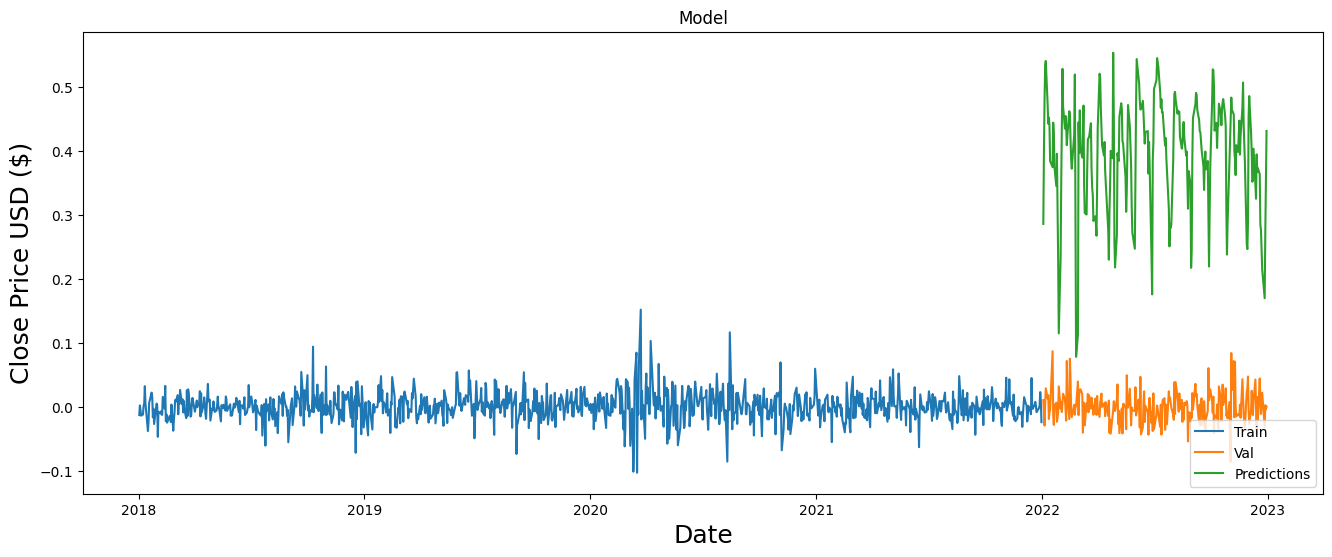

In [40]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['GOLD_Return'])
plt.plot(valid[['GOLD_Return', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
model.save("GOLD_LSTM.h5")

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
